In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!python -m pip install --upgrade pip

#!pip install tensorflow==2.3.1 

#!pip install tensorboard==2.4.1
!pip install torch  #YOLOv5 runs on top of PyTorch, so we need to import it to the notebook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch # YOLOv5 implemented using pytorch

In [ ]:
from IPython.display import Image #this is to render predictions

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14967, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 14967 (delta 13), reused 16 (delta 6), pack-reused 14936
Receiving objects: 100% (14967/14967), 13.95 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (10277/10277), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.4 MB/s eta 0:00:00


# Divide the dataset in train and val folder. 

In [ ]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
#trainPath = '/content/drive/MyDrive/traffic_signal_dataset/data1/images/train'
#valPath = 'D:/yolov5_traffic_sign_detection/dataset/images/val'
crsPath = '/content/drive/MyDrive/traffic_signal_dataset/data1/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  592
Validation images are :  148


In [ ]:

trainimagePath = '/content/drive/MyDrive/traffic_signal_dataset/data1/train/images'
trainlabelPath = '/content/drive/MyDrive/traffic_signal_dataset/data1/train/labels'
valimagePath = '/content/drive/MyDrive/traffic_signal_dataset/data1/test/images'
vallabelPath = '/content/drive/MyDrive/traffic_signal_dataset/data1/test/labels'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(crsPath, valPath) 




NameError: ignored

# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 



In [ ]:
!python train.py --img 415 --batch 16 --epochs 30 --data /content/drive/MyDrive/traffic_signal_dataset/dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/traffic_signal_dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-63-gcdd804d Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

## At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

## Explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

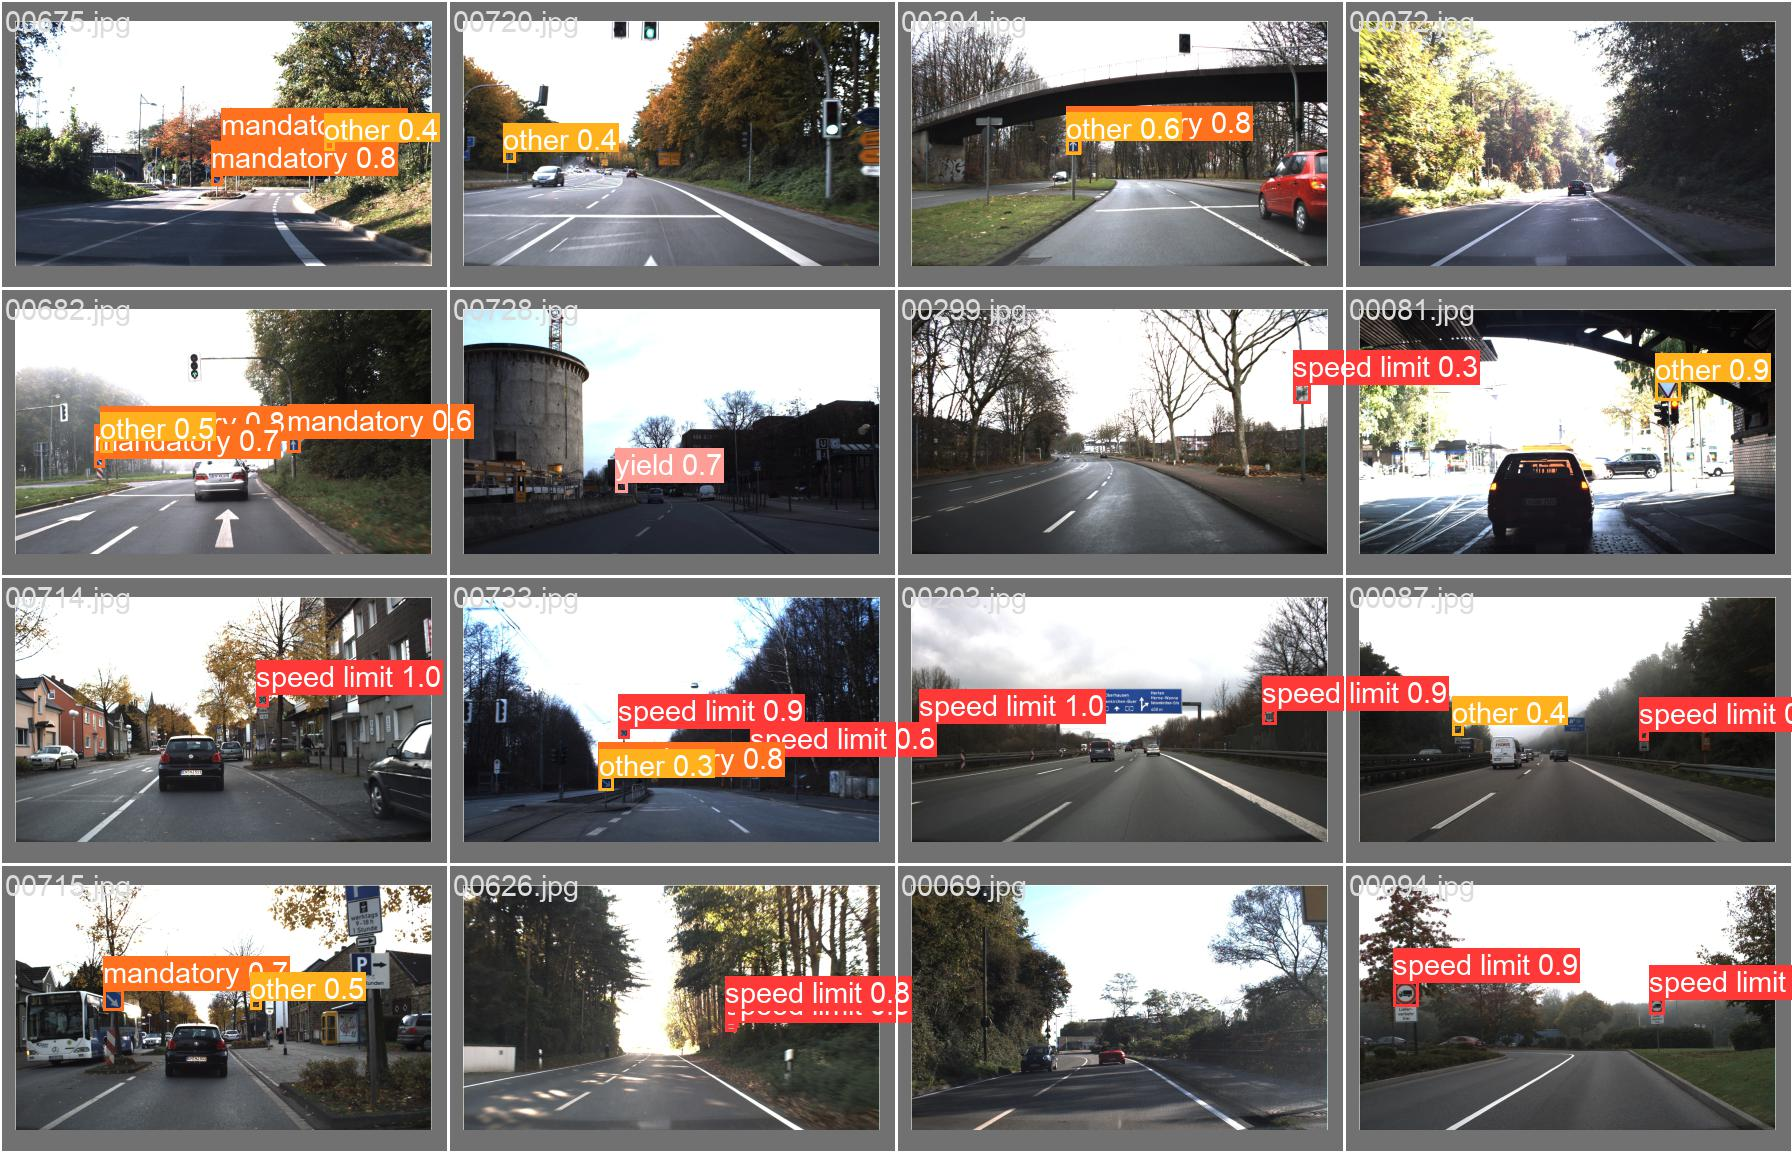

In [ ]:
Image(filename='/content/yolov5/runs/train/exp2/val_batch2_pred.jpg', width=1000)


Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes. 

You’ll be implementing the detect.py script with the best.pt weights and image dimensions of 416x416 pixels (it’s really important to comply with that). The results will be saved to runs/detect/exp. To display the results, run the following code:

In [ ]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python detect.py --source /content/yolov5/runs/train/exp2/val_batch2_pred.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/yolov5/runs/train/exp2/val_batch2_pred.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-63-gcdd804d Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/runs/train/exp2/val_batch2_pred.jpg: 416x640 (no detections), 13.1ms
Speed: 0.5ms pre-process, 13.1ms inference, 0.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


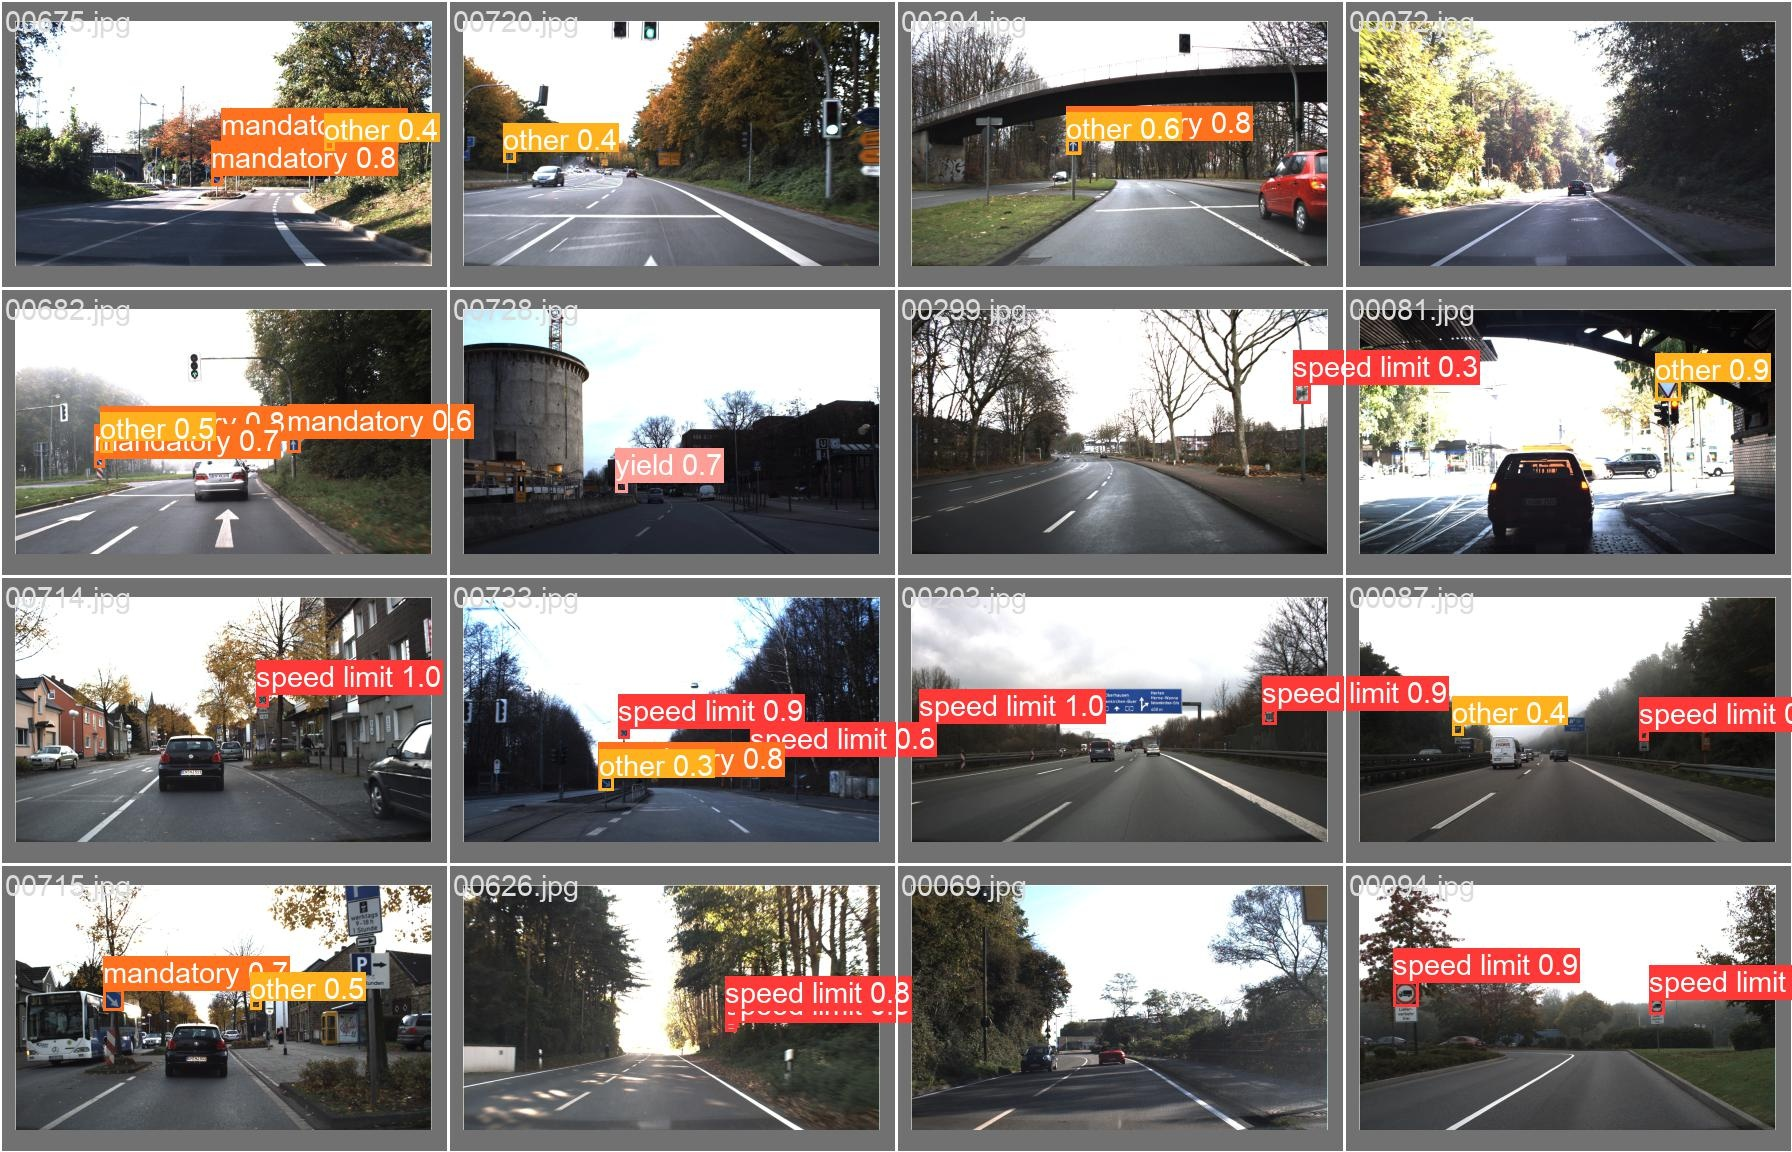

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp2/val_batch2_pred.jpg', width=1000)


In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='/content/yolov5/runs/train/exp2 ')  # plot results.txt as results.png

TypeError: ignored

In [ ]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python detect.py --source /content/drive/MyDrive/traffic_signal_dataset/data1/test/images/00019.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/traffic_signal_dataset/data1/test/images/00019.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-63-gcdd804d Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/traffic_signal_dataset/data1/test/images/00019.jpg: 384x640 1 speed limit, 1 other, 11.8ms
Speed: 0.4ms pre-process, 11.8ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


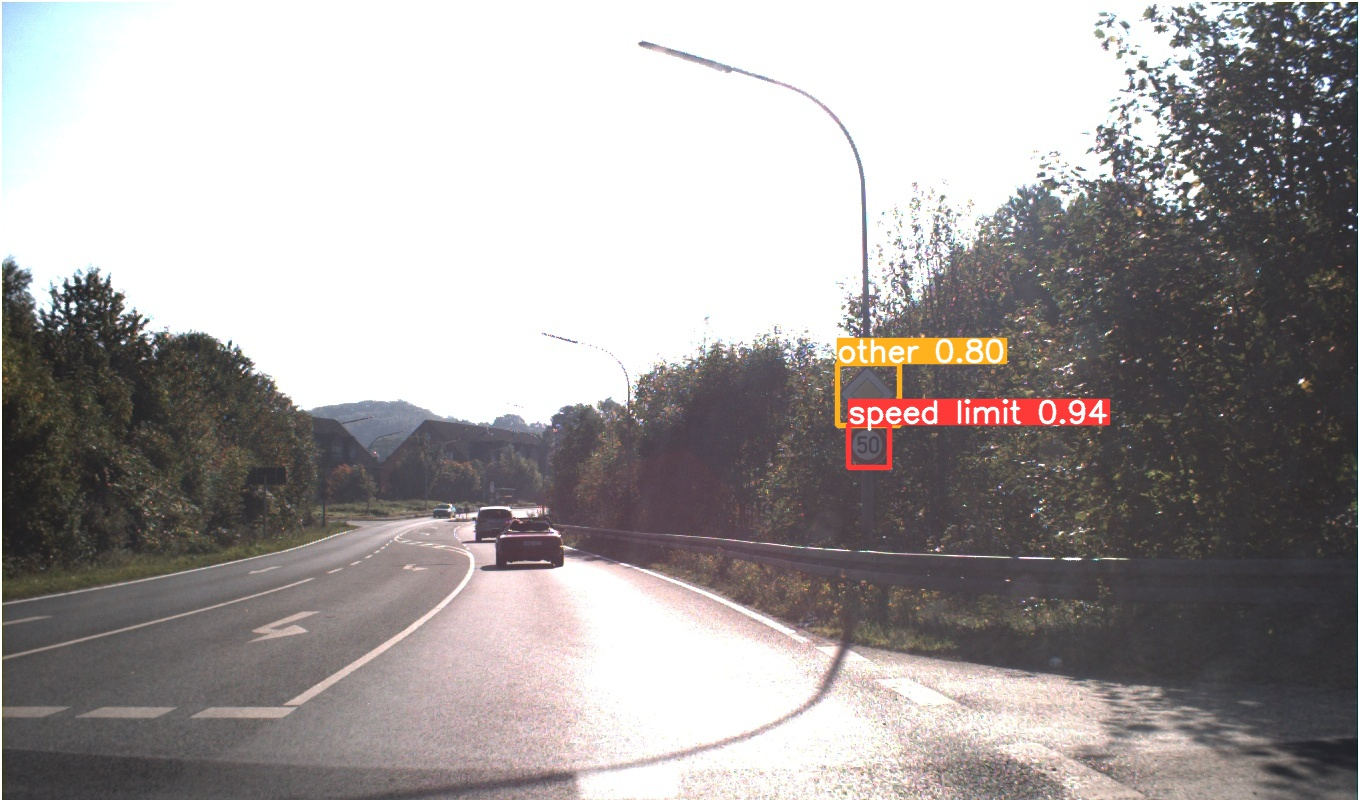

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp3/00019.jpg', width=800)
